<a href="https://colab.research.google.com/github/chemtrailsx/basic-ML-projects/blob/main/basic_linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd
!wget https://raw.githubusercontent.com/sparefordata/data-for-linear-regression/main/Salary_dataset%20-%20Salary_dataset.csv.csv

df = pd.read_csv("Salary_dataset - Salary_dataset.csv.csv")
print(df.head())

--2024-11-08 14:58:25--  https://raw.githubusercontent.com/sparefordata/data-for-linear-regression/main/Salary_dataset%20-%20Salary_dataset.csv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-08 14:58:25 ERROR 404: Not Found.

   YearsExperience  Salary
0              1.2   39344
1              1.4   46206
2              1.6   37732
3              2.1   43526
4              2.3   39892


In [ ]:
print(df.isnull().sum())

# Get data types of each column
print(df.dtypes)

# Generate descriptive statistics
print(df.describe())

YearsExperience    0
Salary             0
dtype: int64
YearsExperience    float64
Salary               int64
dtype: object
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined from the previous code

# Style the table
def stylize_table(df):
    return df.style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('color', 'blue'), ('background-color', '#f0f0f0'), ('text-align', 'center')]},  # Header styles
        {'selector': 'td', 'props': [('font-size', '10pt'), ('color', 'blue'), ('text-align', 'center')]},  # Data cell styles
    ])

# Describe the DataFrame and style it
styled_description = stylize_table(df.describe())

# Display the styled description
styled_description

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


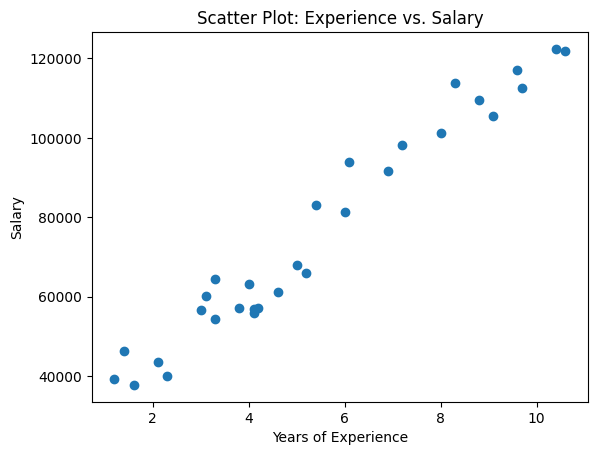

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot: Experience vs. Salary')
plt.show()

In [ ]:
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"The correlation between YearsExperience and Salary is: {correlation}")

if correlation > 0:
    print("YearsExperience and Salary are positively correlated.")
elif correlation < 0:
    print("YearsExperience and Salary are negatively correlated.")
else:
    print("YearsExperience and Salary are not correlated.")

The correlation between YearsExperience and Salary is: 0.9782416184887597
YearsExperience and Salary are positively correlated.


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


In [ ]:
print("Intercept (b):", model.intercept_)
print("Coefficient (w):", model.coef_[0])

Intercept (b): 24380.201479473704
Coefficient (w): 9423.815323030976


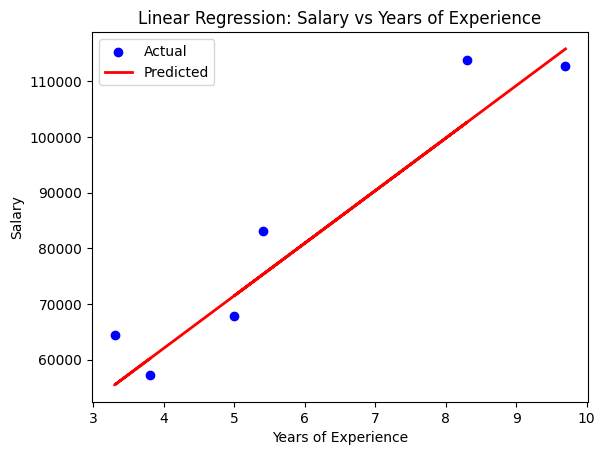

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.show()

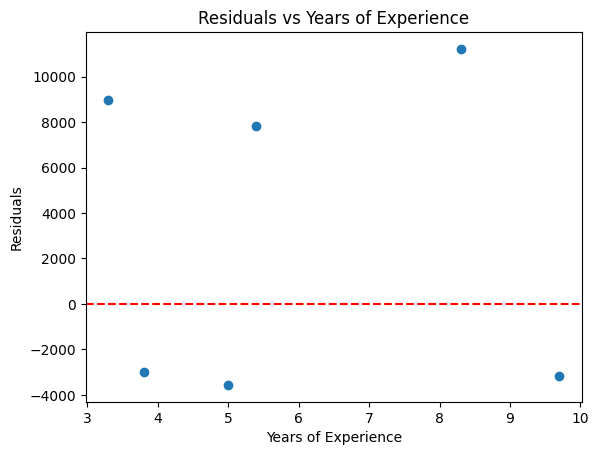

In [ ]:
# Residuals plot
residuals = y_test - y_pred
plt.scatter(X_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.title('Residuals vs Years of Experience')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Cross-validated MSE: 44168849.46887101
